# Weeks 9 & 10 Exeercises
### Angie Oehler
### 05/01/2021

## Activity 9: Extracting the top 100 eBooks

In [2]:
# Import the libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [3]:
# Check the SSL certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [4]:
# Read the HTML 
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

In [8]:
# Write a function to check the status
def status_check(r):
    if r.status_code == 200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

# Check the status
status_check(response)

Success!


1

In [9]:
# Decode the response and pass to beautifulsoup
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [13]:
# Find the href tags, store the list, and check the list
# Create the empty list
href_list = []

# Find the tags and create the list
for link in soup.find_all('a'):
    #print(link.get('href'))
    href_list.append(link.get('href'))

# Print the list
href_list[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [39]:
# Use regular expression to find the numeric digits for the top books
# Empty list
book_nums = []

# Loop over the given range and use regex
for i in range(19,119):
    link=href_list[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        book_nums.append(int(n[0]))

# Print the numbers
print(book_nums)

[1, 1, 7, 7, 30, 30, 84, 1342, 64317, 844, 11, 98, 174, 2542, 1250, 2701, 1661, 1080, 5200, 46, 1952, 1260, 43, 25344, 76, 2852, 65322, 345, 219, 2591, 43453, 55, 74, 65320, 1400, 205, 57775, 65321, 16, 1232, 768, 65318, 65316, 2600, 215, 120, 23, 45, 160, 65324, 26184, 6130, 4300, 2814, 1727, 3825, 14568, 514, 158, 996, 40068, 244, 408, 17635, 58585, 5740, 1497, 65314, 1184, 35899, 2500, 203, 65315, 113, 65319, 135, 100, 236, 36, 65323, 2554, 902, 27827, 730, 829, 16328, 3600, 1837, 5739, 105, 35, 766]


In [40]:
# Use .text to print the first 2000 characters of text
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-05-12163999
last 7 days1131085
last 30 days4971849



Top 100 EBooks yesterd

In [41]:
# Find the names of the top books in the extracted text
# Empty temp list
temp_list = []

In [42]:
# Use splitlines to find the starting index
start_index = soup.text.splitlines().index('Top 100 EBooks yesterday')

In [43]:
# Use splitlines and loop through to add lines to the temp list
for i in range(100):
    temp_list.append(soup.text.splitlines()[start_index + 2 + i])

In [44]:
# Use splitlines again to guild the list from the temp list
ebook_titles = []
for i in range(100):
    id1,id2 = re.match('^[a-zA-Z ]*', temp_list[i]).span()
    ebook_titles.append(temp_list[i][id1:id2])

In [45]:
# Print the titles
for l in ebook_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Frankenstein
Pride and Prejudice by Jane Austen 
The Great Gatsby by F
The Importance of Being Earnest
Alice
A Tale of Two Cities by Charles Dickens 
The Picture of Dorian Gray by Oscar Wilde 
Et dukkehjem
Anthem by Ayn Rand 
Moby Dick
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
A Modest Proposal by Jonathan Swift 
Metamorphosis by Franz Kafka 
A Christmas Carol in Prose
The Yellow Wallpaper by Charlotte Perkins Gilman 
Jane Eyre
The Strange Case of Dr
The Scarlet Letter by Nathaniel Hawthorne 
Adventures of Huckleberry Finn by Mark Twain 
The Hound of the Baskervilles by Arthur Conan Doyle 
How to Get Rich by Anonymous 
Dracula by Bram Stoker 
Heart of Darkness by Joseph Conrad 
Grimms
A Pickle for the Knowing Ones by Timothy Dexter 
The Wonderful Wizard of Oz by L
The Adventures of Tom Sawyer
Kibun Daizin
Great Expectations by Charles Dickens 
Walden
Le jardin des supplices by Octave Mirbeau 
A Pictorial Guide to Mesa Verde National Park by An

## Activity 10: Building a movie database with an API key

In [46]:
# Import the libraries
import urllib.request, urllib.parse, urllib.error
import json

In [47]:
# Open the API Key I received
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [48]:
# Combine the API key and the URL 
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

In [49]:
# Create a function to print the movie data
def print_json(json_data):
    list_keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-" * 50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-" * 50)

In [ ]:
# Skip the movie poster

In [60]:
# Create the function to search for a movie and download the movie data
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)}) + apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
# Error handling        
        if json_data['Response'] == 'True':
            print_json(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [61]:
# Search for the movie Titanic
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=4a4b2c89
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico, Australia, Canada
Awards: Won 11 Oscars. Another 114 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,060,049
imdbID: tt0120338
--------------------------------------------------


In [59]:
# I hate Titanic, so here's a search for my favorite movie. :)
search_movie("Raiders of the Lost Ark")

Retrieving the data of "Raiders of the Lost Ark" now... 
http://www.omdbapi.com/?t=Raiders+of+the+Lost+Ark&apikey=4a4b2c89
--------------------------------------------------
Title: Indiana Jones and the Raiders of the Lost Ark
Year: 1981
Rated: PG
Released: 12 Jun 1981
Runtime: 115 min
Genre: Action, Adventure
Director: Steven Spielberg
Writer: Lawrence Kasdan (screenplay by), George Lucas (story by), Philip Kaufman (story by)
Actors: Harrison Ford, Karen Allen, Paul Freeman, Ronald Lacey
Plot: In 1936, archaeologist and adventurer Indiana Jones is hired by the U.S. government to find the Ark of the Covenant before Adolf Hitler's Nazis can obtain its awesome powers.
Language: English, German, Hebrew, Spanish, Arabic, Nepali
Country: USA
Awards: Won 4 Oscars. Another 33 wins & 24 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.4/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '85/100'}]
Metascore: 85
imdbRating: 8.4
imdbVot

In [62]:
# Check the error handling
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=4a4b2c89
Error encountered:  Movie not found!


## Twitter API Exercise

In [1]:
# Import the libraries, including twitter
# This is after I did the install
import numpy as np
import pandas as pd
import twitter

ModuleNotFoundError: No module named 'twitter'

#### Keys
- API Key: xp3ScJ421NPzYiTqSh8WkyuMz
- API Secret Key: WswMsn7n5obOeoeVNO6Uy0p6ipVoH033vAA4LVIWk6BAFPVTuK
- Bearer token: AAAAAAAAAAAAAAAAAAAAAL8kPwEAAAAA0PZlGhUVmmCyK9%2FOvDkvA1jX6J4%3DSpaZCRCGlGdgrJgKPrSGrSOU0L1lpB6s2T3VnrDMTZnn2xqYEB
- Access Token: 1394777349946740736-TORy3CZM7DvXXMrjXNOi1bRtbU69Ef
- Access Token Secret: seaiUjPqCK27F5UjvDV5gQTMXU9Jlr75RtyhSzGuj9i43

In [ ]:
# I can't get it to recognize that twitter is installed, but I still wanted to do the code
# Below is my best efforts to complete the assignment

# Load my API credentials
api = twitter.Api(consumer_key = 'xp3ScJ421NPzYiTqSh8WkyuMz',
  consumer_secret = 'AAAAAAAAAAAAAAAAAAAAAL8kPwEAAAAA0PZlGhUVmmCyK9%2FOvDkvA1jX6J4%3DSpaZCRCGlGdgrJgKPrSGrSOU0L1lpB6s2T3VnrDMTZnn2xqYEB',
    access_token_key = '1394777349946740736-TORy3CZM7DvXXMrjXNOi1bRtbU69Ef',
    access_token_secret = 'seaiUjPqCK27F5UjvDV5gQTMXU9Jlr75RtyhSzGuj9i43')

In [ ]:
# Search for Bellevue University since 03/01/2021
api.GetSearch(term = 'Bellevue University', 
              since  = 2021-03-01, 
              count = 10)

In [ ]:
# Since an option is to search for an interest, what are some recent paranormal tweets:
api.GetSearch(term = 'Paranormal', 
              since  = 2021-05-01, 
              count = 10)

Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.
- Line
- Scatter
- Bar
- Histogram
- Density Plot
- Pie Chart

In [18]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Import the file
# This is a summary murder file, but not one I'm using for my final project
murder = pd.read_csv("State and City Murder File.csv", low_memory = False)

# List of column names for reference
for col in murder.columns:
    print(col)


ORI
Name
YEAR
MRD
CLR
State
County
Agency


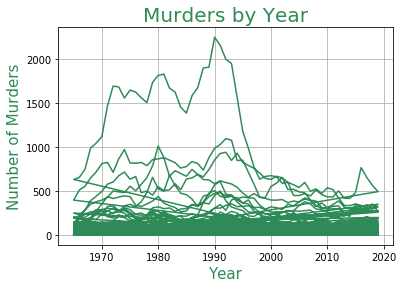

In [37]:
# Line graph to show the number of murders per year
# I'm looking for any peaks out of the norm
plt.plot(murder['YEAR'],murder['MRD'],
        color = 'seagreen')
plt.title('Murders by Year',
         color = 'seagreen',
         fontsize = 20)
plt.xlabel('Year',
         color = 'seagreen',
         fontsize = 15)
plt.ylabel('Number of Murders',
         color = 'seagreen',
         fontsize = 15)
plt.grid(True)
plt.show()


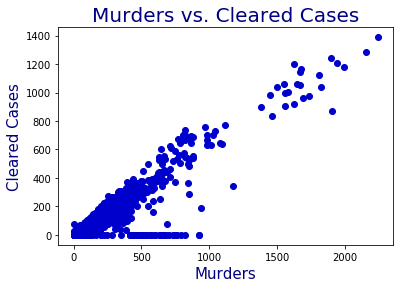

In [38]:
# Scatter plot to show the number of murders and the number cleared
# I want to know if there are any outliers
plt.scatter(murder['MRD'],
            murder['CLR'],
           color = 'mediumblue')
plt.xlabel('Murders',
          fontsize = 15,
          color = 'navy')
plt.ylabel('Cleared Cases',
          fontsize = 15,
          color = 'navy')
plt.title('Murders vs. Cleared Cases',
          fontsize = 20,
          color = 'navy')
plt.show()


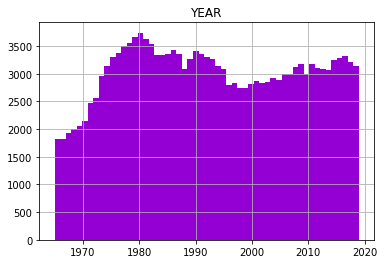

In [96]:
# Histogram showing the murders by year
# I chose a loarger density number becasue there are 55 years captured in the data
murder.hist(column = 'YEAR',
            #density = True, 
            bins = 55,
           color = 'darkviolet')
plt.show()